# DNN estimator architectures and their performance evaluation


## Load Data

In [1]:
import pandas as pd

from data import load_data_selected_features
from pipelines_selected_features import pipeline

train_data, additional_train_data, test_data = load_data_selected_features()
all_train_data = pipeline.fit_transform(pd.concat([train_data, additional_train_data]))

# cut the data into train, additional train and test
train_data = all_train_data.loc[train_data.index]
additional_train_data = all_train_data.loc[additional_train_data.index]

X_train = train_data.drop(columns=['bg+1:00'])
y_train = train_data['bg+1:00']

X_additional_train = additional_train_data.drop(columns=['bg+1:00'])
y_additional_train = additional_train_data['bg+1:00']

# Model used in v4.0

23:19:54 - Start training DNN


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,761 (85.00 KB)

 Trainable params: 21,313 (83.25 KB)

 Non-trainable params: 448 (1.75 KB)

23:19:54 - Selected splitter: ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None)
23:19:54 - Split 1/3
Epoch 1/50
8934/8934 - 6s - 680us/step - loss: 8.2122 - rmse: 2.6673 - val_loss: 4.7194 - val_rmse: 2.1421
Epoch 2/50
8934/8934 - 5s - 564us/step - loss: 5.2881 - rmse: 2.2688 - val_loss: 4.5045 - val_rmse: 2.0949
Epoch 3/50
8934/8934 - 5s - 578us/step - loss: 4.9562 - rmse: 2.1958 - val_loss: 4.3113 - val_rmse: 2.0491
Epoch 4/50
8934/8934 - 5s - 562us/step - loss: 4.7792 - rmse: 2.1556 - val_loss: 4.3082 - val_rmse: 2.0475
Epoch 5/50
8934/8934 - 6s - 617us/step - loss: 4.6477 - rmse: 2.1254 - val_loss: 4.2449 - val_rmse: 2.0316
Epoch 6/50
8934/8934 - 5s - 570us/step - loss: 4.5665 - rmse: 2.1074 - val_loss: 4.3166 - val_rmse: 2.0508
Epoch 7/50
8934/8934 - 5s - 558us/step - loss: 4.5121 - rmse: 2.0949 - val_loss: 4.2288 - val_rmse: 2.0295
Epoch 8/50
8934/8934 - 5s - 558us/step - loss: 4.4581 - rmse: 2.0819 - val_loss: 4.2414 - val_rmse: 2.0328
Epoch 9/50
8934/893

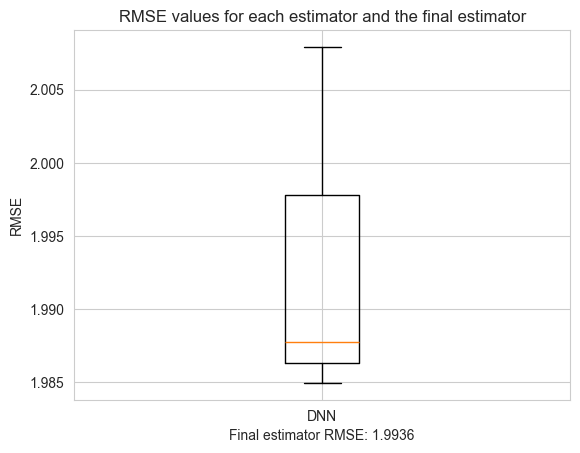

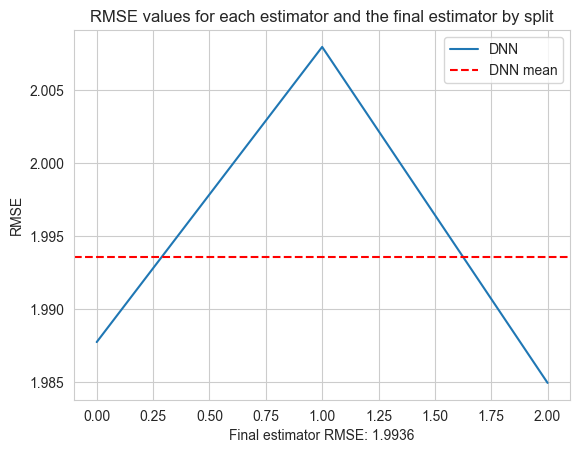

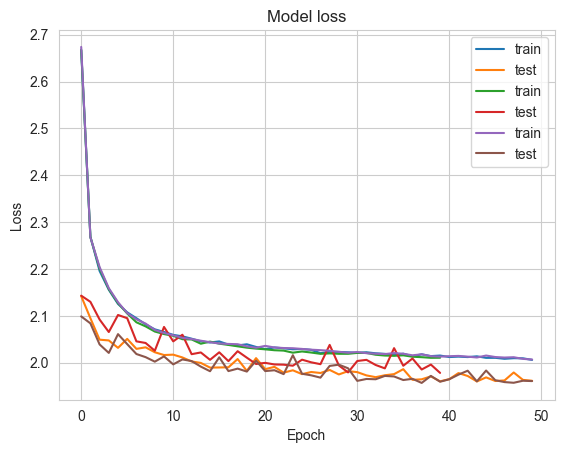

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart, get_history_line_chart
from tensorflow.keras.optimizers import Adam


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def create_dnn_model(input_dimension: int):
    dnn = Sequential([
        Input(shape=(input_dimension,)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(1, activation='linear')
    ])

    dnn.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )

    return dnn


score, histories = calculate_dnn_performance(create_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()

## Adjusted Layer Sizes with More Nonlinearity

23:32:04 - Start training DNN


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,001 (250.00 KB)

 Trainable params: 63,105 (246.50 KB)

 Non-trainable params: 896 (3.50 KB)

23:32:04 - Selected splitter: ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None)
23:32:04 - Split 1/3
Epoch 1/50
8934/8934 - 8s - 906us/step - loss: 7.8526 - rmse: 2.6240 - val_loss: 4.7209 - val_rmse: 2.1438
Epoch 2/50
8934/8934 - 7s - 808us/step - loss: 5.2086 - rmse: 2.2518 - val_loss: 4.4728 - val_rmse: 2.0829
Epoch 3/50
8934/8934 - 7s - 826us/step - loss: 4.9016 - rmse: 2.1838 - val_loss: 4.3240 - val_rmse: 2.0494
Epoch 4/50
8934/8934 - 7s - 799us/step - loss: 4.7727 - rmse: 2.1541 - val_loss: 4.3388 - val_rmse: 2.0540
Epoch 5/50
8934/8934 - 7s - 820us/step - loss: 4.6435 - rmse: 2.1251 - val_loss: 4.2285 - val_rmse: 2.0294
Epoch 6/50
8934/8934 - 7s - 794us/step - loss: 4.5631 - rmse: 2.1061 - val_loss: 4.1713 - val_rmse: 2.0143
Epoch 7/50
8934/8934 - 7s - 794us/step - loss: 4.4991 - rmse: 2.0915 - val_loss: 4.2443 - val_rmse: 2.0322
Epoch 8/50
8934/8934 - 7s - 784us/step - loss: 4.4354 - rmse: 2.0773 - val_loss: 4.1480 - val_rmse: 2.0104
Epoch 9/50
8934/893

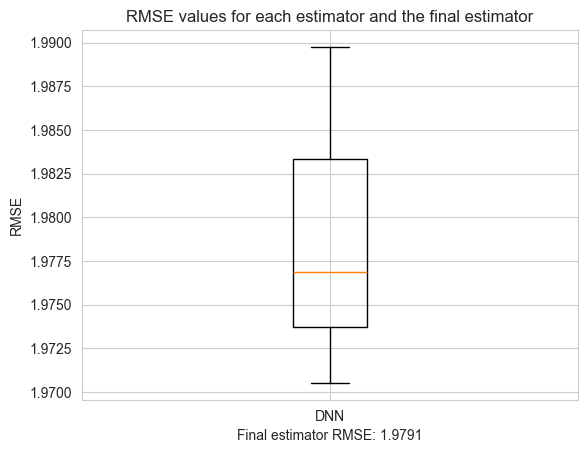

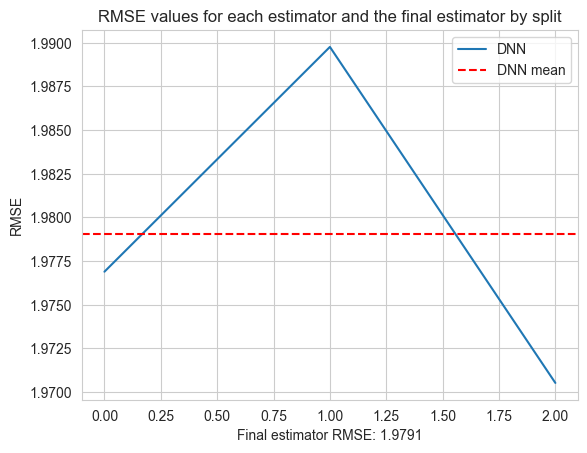

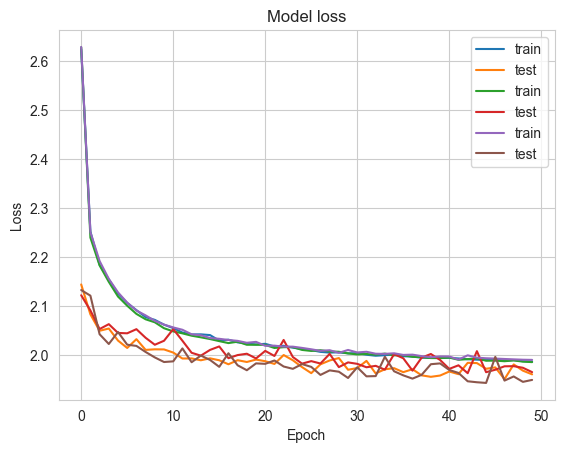

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart, get_history_line_chart
from tensorflow.keras.optimizers import Adam


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def create_dnn_model(input_dimension: int):
    dnn = Sequential([
        Input(shape=(input_dimension,)),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(1, activation='linear')
    ])

    dnn.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )

    return dnn


score, histories = calculate_dnn_performance(create_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()

## Switched to Exponential Linear Unit (ELU) activation function

23:50:45 - Start training DNN


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,761 (85.00 KB)

 Trainable params: 21,313 (83.25 KB)

 Non-trainable params: 448 (1.75 KB)

23:50:45 - Selected splitter: ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None)
23:50:45 - Split 1/3
Epoch 1/50
8934/8934 - 8s - 878us/step - loss: 8.0893 - rmse: 2.6522 - val_loss: 4.6601 - val_rmse: 2.1229
Epoch 2/50
8934/8934 - 6s - 654us/step - loss: 5.2718 - rmse: 2.2650 - val_loss: 4.4142 - val_rmse: 2.0735
Epoch 3/50
8934/8934 - 6s - 621us/step - loss: 4.9783 - rmse: 2.2013 - val_loss: 4.3718 - val_rmse: 2.0634
Epoch 4/50
8934/8934 - 6s - 682us/step - loss: 4.7784 - rmse: 2.1559 - val_loss: 4.3024 - val_rmse: 2.0461
Epoch 5/50
8934/8934 - 6s - 702us/step - loss: 4.6536 - rmse: 2.1269 - val_loss: 4.3175 - val_rmse: 2.0496
Epoch 6/50
8934/8934 - 6s - 662us/step - loss: 4.5600 - rmse: 2.1065 - val_loss: 4.3683 - val_rmse: 2.0598
Epoch 7/50
8934/8934 - 6s - 652us/step - loss: 4.5080 - rmse: 2.0942 - val_loss: 4.1932 - val_rmse: 2.0218
Epoch 8/50
8934/8934 - 6s - 676us/step - loss: 4.4614 - rmse: 2.0832 - val_loss: 4.2488 - val_rmse: 2.0349
Epoch 9/50
8934/893

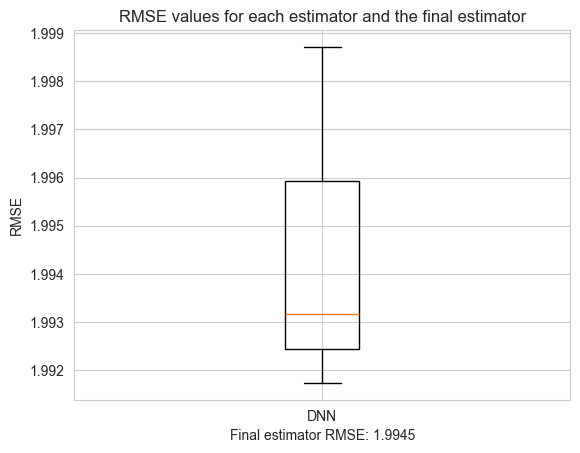

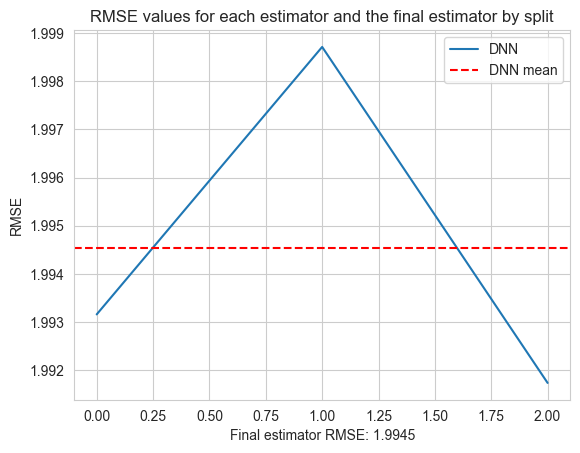

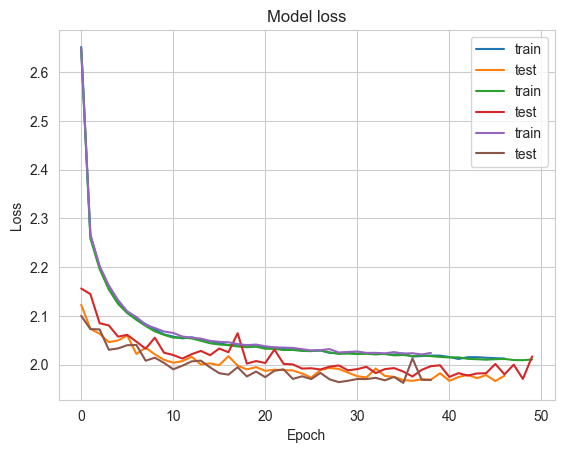

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart, get_history_line_chart
from tensorflow.keras.optimizers import Adam


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def create_dnn_model(input_dimension: int):
    dnn = Sequential([
        Input(shape=(input_dimension,)),
        Dense(128, activation='elu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='elu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='elu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(1, activation='linear')
    ])

    dnn.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )

    return dnn


score, histories = calculate_dnn_performance(create_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()


## Residual Connections (Inspired by ResNet)

00:04:14 - Start training DNN


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 81)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_48 (Dense)    │ (None, 128)       │     10,496 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_48[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_49 (Dense)    │ (None, 128)       │     16,512 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 128)       │     10,496 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_49[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128)       │          0 │ dense_50[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_51 (Dense)    │ (None, 64)        │      8,256 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_51[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_52 (Dense)    │ (None, 64)        │      4,160 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_53 (Dense)    │ (None, 64)        │      8,256 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_52[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64)        │          0 │ dense_53[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_54 (Dense)    │ (None, 32)        │      2,080 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_54[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_55 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_56 (Dense)    │ (None, 32)        │      2,080 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_55[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 32)        │          0 │ dense_56[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_57 (Dense)    │ (None, 1)         │         33 │ add_2[0][0]     

 Total params: 65,217 (254.75 KB)

 Trainable params: 64,321 (251.25 KB)

 Non-trainable params: 896 (3.50 KB)

00:04:14 - Selected splitter: ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None)
00:04:14 - Split 1/3
Epoch 1/50
8934/8934 - 10s - 1ms/step - loss: 5.0090 - rmse: 2.1667 - val_loss: 4.8693 - val_rmse: 2.1675
Epoch 2/50
8934/8934 - 10s - 1ms/step - loss: 4.1969 - rmse: 2.0170 - val_loss: 4.4254 - val_rmse: 2.0768
Epoch 3/50
8934/8934 - 9s - 1ms/step - loss: 4.0788 - rmse: 1.9827 - val_loss: 4.2950 - val_rmse: 2.0345
Epoch 4/50
8934/8934 - 9s - 1ms/step - loss: 3.9647 - rmse: 1.9605 - val_loss: 5.0363 - val_rmse: 2.0583
Epoch 5/50
8934/8934 - 10s - 1ms/step - loss: 3.8693 - rmse: 1.9390 - val_loss: 4.2046 - val_rmse: 2.0178
Epoch 6/50
8934/8934 - 8s - 941us/step - loss: 3.8194 - rmse: 1.9265 - val_loss: 4.8807 - val_rmse: 2.0461
Epoch 7/50
8934/8934 - 8s - 937us/step - loss: 3.7841 - rmse: 1.9174 - val_loss: 4.0769 - val_rmse: 1.9894
Epoch 8/50
8934/8934 - 9s - 981us/step - loss: 3.7507 - rmse: 1.9071 - val_loss: 7.0053 - val_rmse: 2.0501
Epoch 9/50
8934/8934 - 9s 

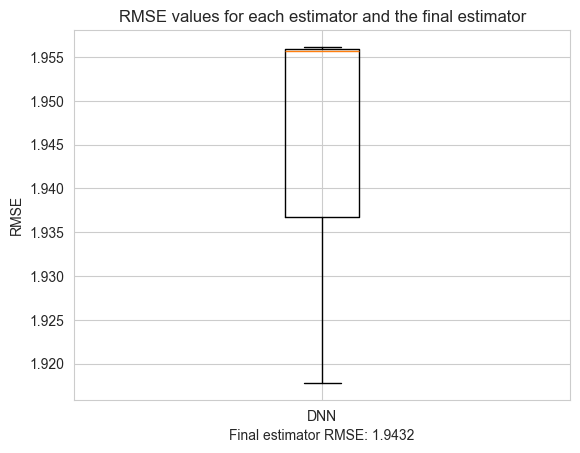

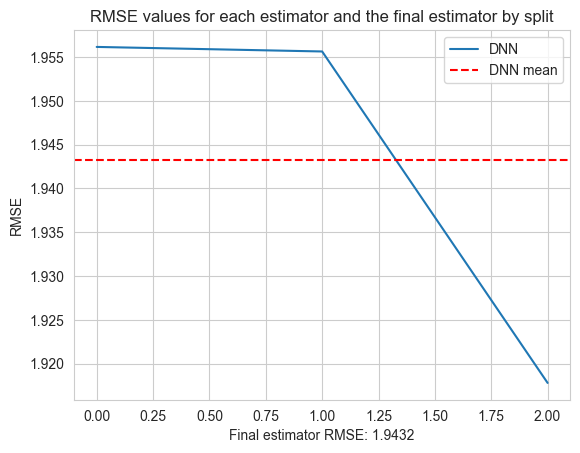

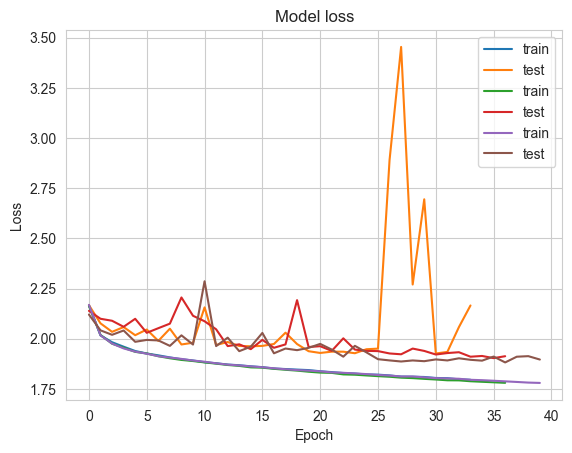

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Add, Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart, get_history_line_chart
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Add


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def create_dnn_model(input_dimension: int):
    
    def residual_block(input_layer, units):
        # First dense layer
        dense1 = Dense(units, activation='relu')(input_layer)
        batchnorm1 = BatchNormalization()(dense1)
        # Second dense layer
        dense2 = Dense(units, activation='relu')(batchnorm1)
        batchnorm2 = BatchNormalization()(dense2)
        # Add projection if shapes don't match
        if input_layer.shape[-1] != units:
            input_layer = Dense(units)(input_layer)  # Project input to match dimensions
        # Add the skip connection
        return Add()([input_layer, batchnorm2])

    input_layer = Input(shape=(input_dimension,))
    residual1 = residual_block(input_layer, 128)
    residual2 = residual_block(residual1, 64)
    residual3 = residual_block(residual2, 32)

    output = Dense(1, activation='linear')(residual3)

    dnn = Model(inputs=input_layer, outputs=output)

    dnn.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )
    
    return dnn


score, histories = calculate_dnn_performance(create_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()

### Advanced Optimizer: Learning Rate Scheduler

00:20:52 - Start training DNN


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,761 (85.00 KB)

 Trainable params: 21,313 (83.25 KB)

 Non-trainable params: 448 (1.75 KB)

00:20:52 - Selected splitter: ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None)
00:20:52 - Split 1/3
Epoch 1/50
8934/8934 - 6s - 674us/step - loss: 8.2585 - rmse: 2.6723 - val_loss: 4.6510 - val_rmse: 2.1273 - learning_rate: 1.0000e-03
Epoch 2/50
8934/8934 - 6s - 631us/step - loss: 5.2768 - rmse: 2.2655 - val_loss: 4.5320 - val_rmse: 2.0978 - learning_rate: 1.0000e-03
Epoch 3/50
8934/8934 - 5s - 591us/step - loss: 4.9744 - rmse: 2.1995 - val_loss: 4.3397 - val_rmse: 2.0543 - learning_rate: 1.0000e-03
Epoch 4/50
8934/8934 - 5s - 598us/step - loss: 4.7925 - rmse: 2.1588 - val_loss: 4.4039 - val_rmse: 2.0710 - learning_rate: 1.0000e-03
Epoch 5/50
8934/8934 - 6s - 640us/step - loss: 4.6427 - rmse: 2.1252 - val_loss: 4.2540 - val_rmse: 2.0353 - learning_rate: 1.0000e-03
Epoch 6/50
8934/8934 - 5s - 610us/step - loss: 4.5658 - rmse: 2.1064 - val_loss: 4.2350 - val_rmse: 2.0292 - learning_rate: 1.0000e-03
Epoch 7/50
8934/8934 - 6s - 616us/step - loss: 4.5021 - rmse: 2.0

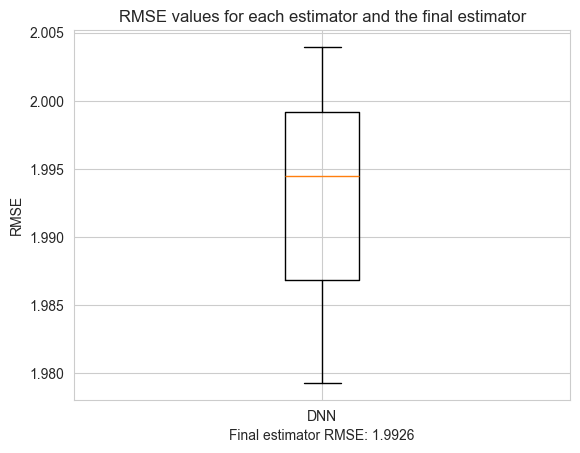

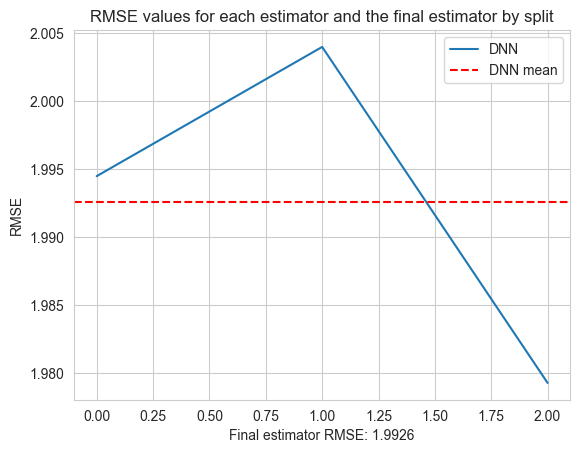

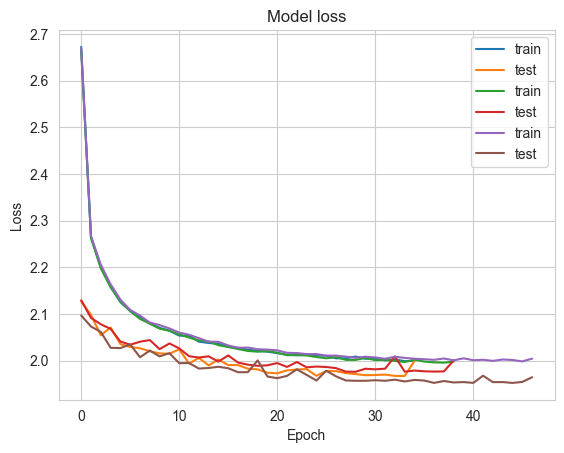

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart, get_history_line_chart
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9


lr_scheduler = LearningRateScheduler(scheduler)


def create_dnn_model(input_dimension: int):
    dnn = Sequential([
        Input(shape=(input_dimension,)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(1, activation='linear')
    ])

    dnn.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )

    return dnn


score, histories = calculate_dnn_performance(create_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50, callbacks=[lr_scheduler])
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()

## Hybrid Model (Combining Linear and Nonlinear Components)



00:34:57 - Start training DNN


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 81)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_105 (Dense)   │ (None, 128)       │     10,496 │ input_layer_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_105[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_106 (Dense)   │ (None, 64)        │      8,256 │ dropout_48[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_106[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_49          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_107 (Dense)   │ (None, 32)        │      2,080 │ dropout_49[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_104 (Dense)   │ (None, 1)         │         82 │ input_layer_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_107[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 33)        │          0 │ dense_104[0][0],  │
│ (Concatenate)       │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_108 (Dense)   │ (None, 1)         │         34 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 21,844 (85.33 KB)

 Trainable params: 21,396 (83.58 KB)

 Non-trainable params: 448 (1.75 KB)

00:34:57 - Selected splitter: ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None)
00:34:57 - Split 1/3
Epoch 1/50
8934/8934 - 8s - 913us/step - loss: 6.2978 - rmse: 2.3117 - val_loss: 4.6140 - val_rmse: 2.1174
Epoch 2/50
8934/8934 - 7s - 790us/step - loss: 4.2355 - rmse: 2.0298 - val_loss: 4.4103 - val_rmse: 2.0731
Epoch 3/50
8934/8934 - 8s - 941us/step - loss: 4.1211 - rmse: 2.0019 - val_loss: 4.3180 - val_rmse: 2.0500
Epoch 4/50
8934/8934 - 7s - 737us/step - loss: 4.0562 - rmse: 1.9865 - val_loss: 4.2372 - val_rmse: 2.0314
Epoch 5/50
8934/8934 - 6s - 660us/step - loss: 4.0129 - rmse: 1.9758 - val_loss: 4.2991 - val_rmse: 2.0453
Epoch 6/50
8934/8934 - 6s - 673us/step - loss: 3.9812 - rmse: 1.9683 - val_loss: 4.2380 - val_rmse: 2.0306
Epoch 7/50
8934/8934 - 7s - 742us/step - loss: 3.9520 - rmse: 1.9604 - val_loss: 4.2007 - val_rmse: 2.0222
Epoch 8/50
8934/8934 - 6s - 640us/step - loss: 3.9299 - rmse: 1.9546 - val_loss: 4.1238 - val_rmse: 2.0037
Epoch 9/50
8934/893

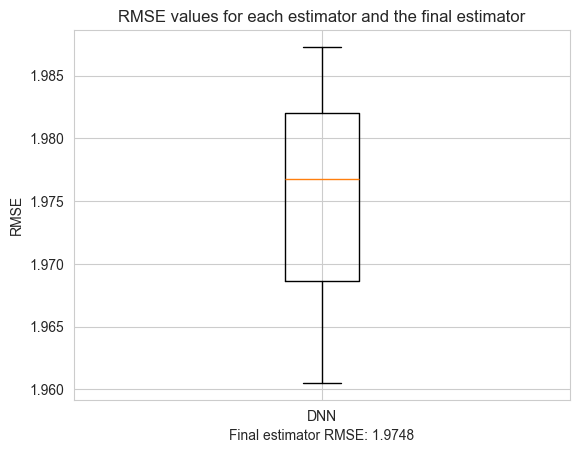

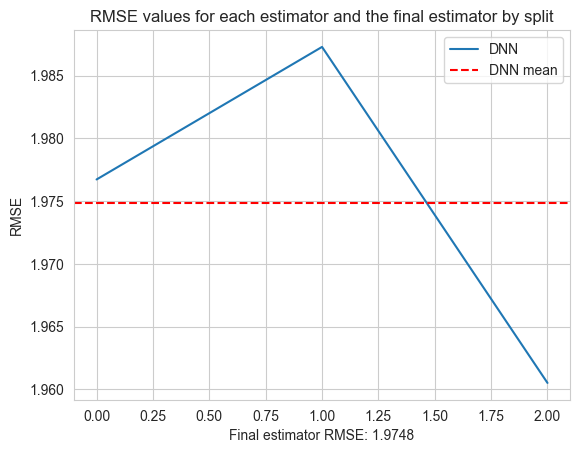

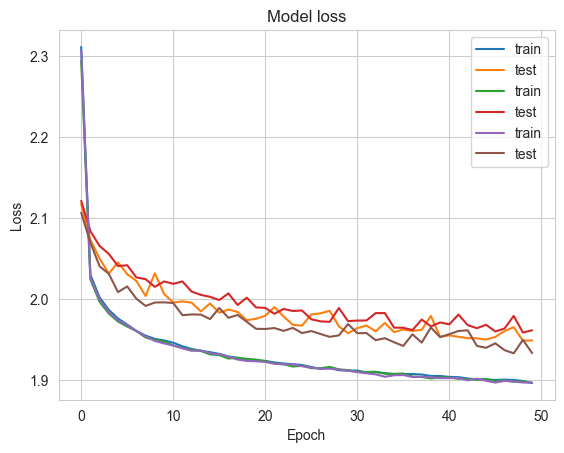

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart, get_history_line_chart
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Concatenate


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def create_dnn_model(input_dimension: int):
    input_layer = Input(shape=(input_dimension,))

    # Linear component
    linear = Dense(1, activation='linear')(input_layer)

    # Nonlinear component
    nonlinear = Dense(128, activation='relu')(input_layer)
    nonlinear = BatchNormalization()(nonlinear)
    nonlinear = Dropout(0.3)(nonlinear)
    nonlinear = Dense(64, activation='relu')(nonlinear)
    nonlinear = BatchNormalization()(nonlinear)
    nonlinear = Dropout(0.3)(nonlinear)
    nonlinear = Dense(32, activation='relu')(nonlinear)
    nonlinear = BatchNormalization()(nonlinear)

    # Merge linear and nonlinear components
    merged = Concatenate()([linear, nonlinear])
    output = Dense(1, activation='linear')(merged)

    dnn = Model(inputs=input_layer, outputs=output)

    dnn.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )

    return dnn


score, histories = calculate_dnn_performance(create_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()

## Others Optimizers

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart, get_history_line_chart
from tensorflow.keras.optimizers import Adam


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def create_dnn_model(input_dimension: int):
    dnn = Sequential([
        # Input Layer
        Input(shape=(input_dimension,)),
        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),

        # Hidden Layer 1
        Dense(64),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),

        # Hidden Layer 2    
        Dense(32),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),

        # Output Layer
        Dense(1, activation='linear')
    ])

    dnn.compile(optimizer='adam', loss='mse', metrics=[rmse])

    return dnn


score = calculate_dnn_performance(create_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()

00:52:19 - Start training DNN


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_124 (Dense)               │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_84          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_85          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_86          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,761 (85.00 KB)

 Trainable params: 21,313 (83.25 KB)

 Non-trainable params: 448 (1.75 KB)

00:52:19 - Selected splitter: ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None)
00:52:19 - Split 1/3
Epoch 1/50
8934/8934 - 9s - 976us/step - loss: 10.2092 - rmse: 3.0303 - val_loss: 5.9196 - val_rmse: 2.3994
Epoch 2/50
8934/8934 - 7s - 765us/step - loss: 5.6181 - rmse: 2.3365 - val_loss: 4.8156 - val_rmse: 2.1664
Epoch 3/50
8934/8934 - 7s - 766us/step - loss: 5.1175 - rmse: 2.2313 - val_loss: 4.5059 - val_rmse: 2.0950
Epoch 4/50
8934/8934 - 7s - 760us/step - loss: 4.9561 - rmse: 2.1957 - val_loss: 4.6110 - val_rmse: 2.1207
Epoch 5/50
8934/8934 - 6s - 646us/step - loss: 4.9126 - rmse: 2.1862 - val_loss: 4.6772 - val_rmse: 2.1358
Epoch 6/50
8934/8934 - 6s - 637us/step - loss: 4.8794 - rmse: 2.1777 - val_loss: 4.4917 - val_rmse: 2.0928
Epoch 7/50
8934/8934 - 6s - 640us/step - loss: 4.8470 - rmse: 2.1717 - val_loss: 4.3567 - val_rmse: 2.0610
Epoch 8/50
8934/8934 - 6s - 637us/step - loss: 4.8521 - rmse: 2.1725 - val_loss: 4.6740 - val_rmse: 2.1345
Epoch 9/50
8934/89

AttributeError: 'list' object has no attribute 'rmse'

## Evaluate a DNN Model with Early Stopping

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart, get_history_line_chart
from tensorflow.keras.optimizers import Adam


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def create_dnn_model(input_dimension: int):
    dnn = Sequential([
        Input(shape=(input_dimension,)),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1, activation='linear')
    ])

    dnn.compile(optimizer='adam', loss='mse', metrics=[rmse])

    return dnn


score, histories = calculate_dnn_performance(create_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()

## Simple and wide model

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart, get_history_line_chart
from tensorflow.keras.optimizers import Adam


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def create_dnn_model(input_dimension: int):
    dnn = Sequential([
        Input(shape=(input_dimension,)),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        Dropout(0.4),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        Dropout(0.3),
        Dense(1, activation='linear')
    ])

    dnn.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )

    return dnn


score, histories = calculate_dnn_performance(create_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()

## Shallow with Feature Compression

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart, get_history_line_chart
from tensorflow.keras.optimizers import Adam


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def create_dnn_model(input_dimension: int):
    dnn = Sequential([
        Input(shape=(input_dimension,)),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='linear')
    ])

    dnn.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )

    return dnn


score, histories = calculate_dnn_performance(create_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()

### Wider Network (No Gradual Reduction)

In [ ]:

def get_dnn_model(input_dimension: int):
    dnn = Sequential([
        Input(shape=(input_dimension,)),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(1, activation='linear')
    ])

    dnn.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )

    return dnn


score, histories = calculate_dnn_performance(get_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()

### Wide and Deep Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate


def get_dnn_model(input_dimension: int):
    input_layer = Input(shape=(input_dimension,))
    wide = Dense(128, activation='relu')(input_layer)  # Wide component
    deep = Dense(128, activation='relu')(input_layer)
    deep = Dense(64, activation='relu')(deep)
    deep = Dense(32, activation='relu')(deep)

    merged = Concatenate()([wide, deep])
    output_layer = Dense(1, activation='linear')(merged)

    dnn = Model(inputs=input_layer, outputs=output_layer)

    dnn.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )

    return dnn


score, histories = calculate_dnn_performance(get_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()

## Regularized Wide & Deep Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart, get_history_line_chart


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def get_dnn_model(input_dimension: int):
    input_layer = Input(shape=(input_dimension,))

    # Wide part of the model with L2 regularization and Dropout
    wide = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
    wide = Dropout(0.5)(wide)
    wide = BatchNormalization()(wide)

    # Deep part of the model with L2 regularization, Dropout, and BatchNormalization
    deep = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
    deep = Dropout(0.5)(deep)
    deep = BatchNormalization()(deep)

    deep = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(deep)
    deep = Dropout(0.5)(deep)
    deep = BatchNormalization()(deep)

    deep = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(deep)
    deep = Dropout(0.5)(deep)
    deep = BatchNormalization()(deep)

    # Merge the wide and deep components
    merged = Concatenate()([wide, deep])

    # Output layer
    output_layer = Dense(1, activation='linear')(merged)

    # Create the model
    dnn_model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    dnn_model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )

    return dnn_model


score, histories = calculate_dnn_performance(get_dnn_model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()
get_history_line_chart(histories).show()